In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from heracles.core import TocDict


color=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
fsky = 0.1250422795613607

def get_cls_heracles(fitsfile):
    hdul = fits.open(fitsfile)
    toc = hdul[1].data
    cls = {}
    for i in range(toc.size):
        cls[toc[i][1], toc[i][2], toc[i][3], toc[i][4]] = hdul[i+2].data
    return TocDict(cls)

In [7]:
cls_nmt_debias = np.load('../data/measurement/test_estimate_cl_depixFalse_noiseTrue.npy', allow_pickle=True).item()
cls_nmt_bias = np.load('../data/measurement/test_estimate_cl_depixFalse_noiseFalse.npy', allow_pickle=True).item()
ell_nmt = cls_nmt_debias['ell']
print(cls_nmt_bias.keys())

odict_keys(['D11-D11', 'D11-D12', 'D12-D12', 'D11-G11', 'D11-G12', 'D12-G11', 'D12-G12', 'G11-G11', 'G11-G12', 'G12-G12', 'ell'])


In [5]:
#-- Heracles
ref_heracles = '../data/heracles_output/FS2_spectra_1024_wo_noise_bin0-12.fits'
cls_her = get_cls_heracles(ref_heracles)
ell_her = cls_her['D', 'D', 0, 0]['L']
print(cls_her)

{('D', 'D', 0, 0): FITS_rec([(  17., 5.18426448e-06,   10.,   25., 15.),
          (  32., 3.70636583e-06,   25.,   40., 15.),
          (  47., 2.51324165e-06,   40.,   55., 15.),
          (  62., 1.95459636e-06,   55.,   70., 15.),
          (  77., 1.51506664e-06,   70.,   85., 15.),
          (  92., 1.27560255e-06,   85.,  100., 15.),
          ( 107., 1.02322378e-06,  100.,  115., 15.),
          ( 122., 8.15046281e-07,  115.,  130., 15.),
          ( 137., 7.26375991e-07,  130.,  145., 15.),
          ( 152., 6.68193330e-07,  145.,  160., 15.),
          ( 167., 5.68563530e-07,  160.,  175., 15.),
          ( 182., 4.60531867e-07,  175.,  190., 15.),
          ( 197., 3.89256504e-07,  190.,  205., 15.),
          ( 212., 3.63244867e-07,  205.,  220., 15.),
          ( 227., 3.29670978e-07,  220.,  235., 15.),
          ( 242., 3.17945002e-07,  235.,  250., 15.),
          ( 257., 2.87297717e-07,  250.,  265., 15.),
          ( 272., 2.53945228e-07,  265.,  280., 15.),
         

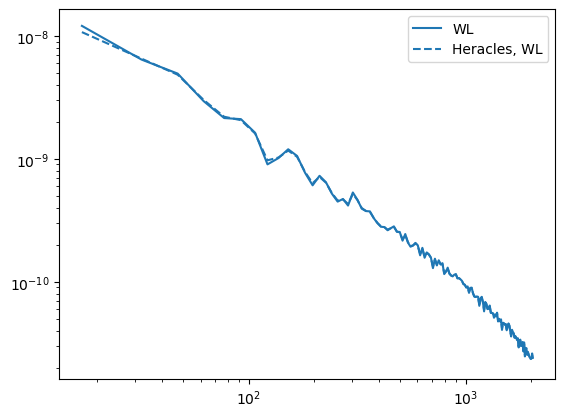

In [15]:
plt.figure()

# plt.loglog(ell_nmt, abs(cls_nmt_debias['D0-D12']), label='GC', c=color[0])
# plt.loglog(ell_her, abs(cls_her['D', 'D', 0, 1]['CL'])/fsky, label='Heracles, GC', c=color[0], ls='--')

plt.loglog(ell_nmt, abs(cls_nmt_debias['G0-G12']), label='WL', c=color[0])
plt.loglog(ell_her, abs(cls_her['G_E', 'G_E', 0, 1]['CL'])/fsky, label='Heracles, WL', c=color[0], ls='--')

# plt.loglog(ell_nmt, abs(cls_nmt_debias['D0-G0']), label='GGL', c=color[2])
# plt.loglog(ell_her, abs(cls_her['D', 'G_E', 0, 0]['CL']/fsky), label='Heracles, GGL', c=color[2], ls='--')

plt.legend()
plt.show()